# Probabilistic PCA Image Reconstruction

In [1]:
# import libraries
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# load the data and pre-process it
def load_mnist():
    # Load MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape and normalize the images
    X_train = X_train.reshape(-1, 28*28) / 255.0
    X_test = X_test.reshape(-1, 28*28) / 255.0

    return X_train, X_test, y_train, y_test

# Load MNIST dataset using the defined function
X_train, X_test, y_train, y_test = load_mnist()

# Display shapes of the datasets
print("Shapes after preprocessing:")
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Shapes after preprocessing:
Training set: (60000, 784) (60000,)
Testing set: (10000, 784) (10000,)


In [3]:
# define principal component values
n_components_list = [2, 4, 8, 16, 32, 64]

Performing Probabilistic PCA reconstruction with 2 principal components...
Train MSE: 0.055953
Performing Probabilistic PCA reconstruction with 4 principal components...
Train MSE: 0.048179
Performing Probabilistic PCA reconstruction with 8 principal components...
Train MSE: 0.037865
Performing Probabilistic PCA reconstruction with 16 principal components...
Train MSE: 0.027293
Performing Probabilistic PCA reconstruction with 32 principal components...
Train MSE: 0.017243
Performing Probabilistic PCA reconstruction with 64 principal components...
Train MSE: 0.009284


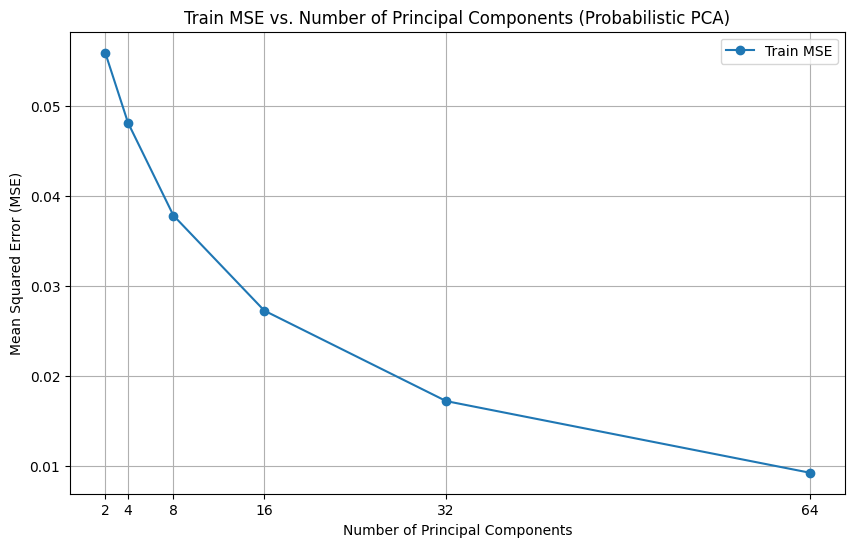

In [6]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
mse_values = []
top_eigenvectors_list = []
    
# Step 1: Center the Data
mean_vector = np.mean(X_train, axis=0)
centered_data = X_train - mean_vector

for n_components in n_components_list:
    print(f"Performing Probabilistic PCA reconstruction with {n_components} principal components...")
    
    # Step 2: Compute the Covariance Matrix
    cov_matrix = np.cov(centered_data, rowvar=False)
    
    # Step 3: Eigenvalue Decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]
    top_eigenvectors_list.append(top_eigenvectors)
    
    # Step 4: Probabilistic PCA Transformation
    X_train_pca = np.dot(centered_data, top_eigenvectors)
    X_train_reconstructed = np.dot(X_train_pca, top_eigenvectors.T) + mean_vector
    
    # Calculate MSE using scikit-learn
    train_mse = mean_squared_error(X_train, X_train_reconstructed)
    mse_values.append((n_components, train_mse))
    print(f"Train MSE: {train_mse:.6f}")

# Plot MSE values
plt.figure(figsize=(10, 6))
plt.plot([n for n, _ in mse_values], [train_mse for _, train_mse in mse_values], marker='o', label='Train MSE')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train MSE vs. Number of Principal Components (Probabilistic PCA)')
plt.xticks(n_components_list)
plt.legend()
plt.grid(True)
plt.show()

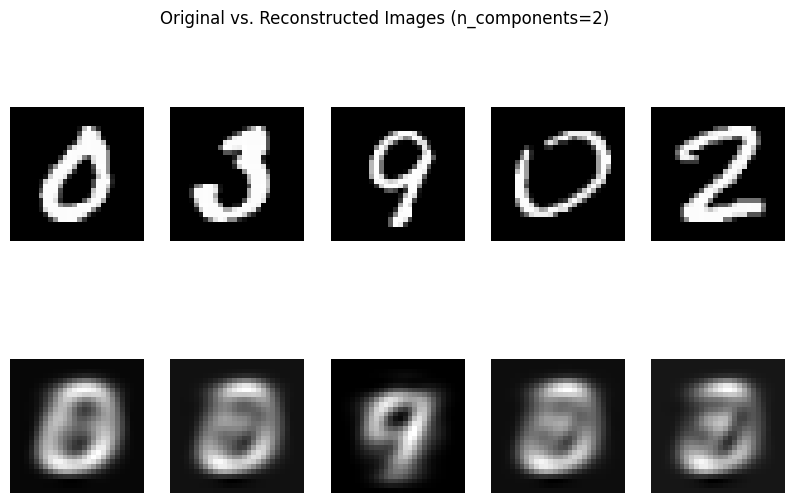

In [8]:
# Calculate the mean vector using the training data
mean_vector_train = np.mean(X_train, axis=0)

# Randomly select 5 indices from X_test
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
selected_images = X_test[random_indices]

# Use the previously computed top_eigenvectors for n_components=2
n_components = 2
top_eigenvectors = top_eigenvectors_list[n_components_list.index(n_components)]

# Center the selected test images using the mean vector from the training data
centered_selected_images = selected_images - mean_vector_train

# Perform PCA transformation
X_test_pca = np.dot(centered_selected_images, top_eigenvectors)

# Reconstruct the images
X_test_reconstructed = np.dot(X_test_pca, top_eigenvectors.T) + mean_vector_train

# Plot original and reconstructed images
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_test_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle(f"Original vs. Reconstructed Images (n_components={n_components})")
plt.show()

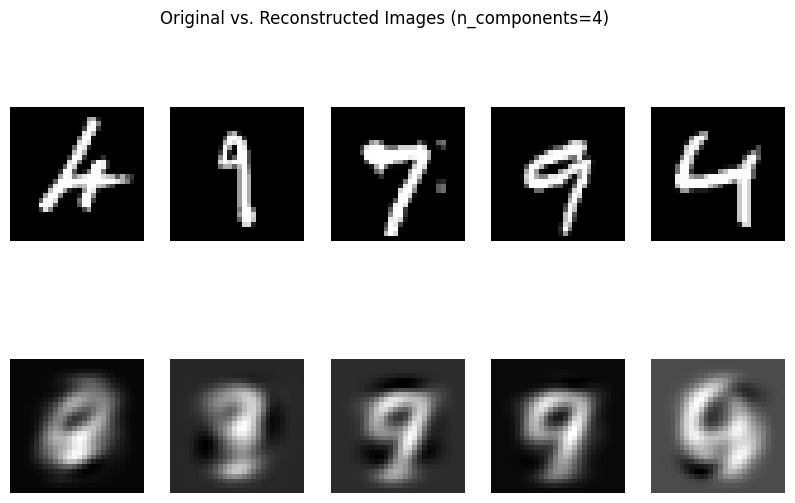

In [9]:
# Calculate the mean vector using the training data
mean_vector_train = np.mean(X_train, axis=0)

# Randomly select 5 indices from X_test
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
selected_images = X_test[random_indices]

# Use the previously computed top_eigenvectors for n_components=2
n_components = 4
top_eigenvectors = top_eigenvectors_list[n_components_list.index(n_components)]

# Center the selected test images using the mean vector from the training data
centered_selected_images = selected_images - mean_vector_train

# Perform PCA transformation
X_test_pca = np.dot(centered_selected_images, top_eigenvectors)

# Reconstruct the images
X_test_reconstructed = np.dot(X_test_pca, top_eigenvectors.T) + mean_vector_train

# Plot original and reconstructed images
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_test_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle(f"Original vs. Reconstructed Images (n_components={n_components})")
plt.show()

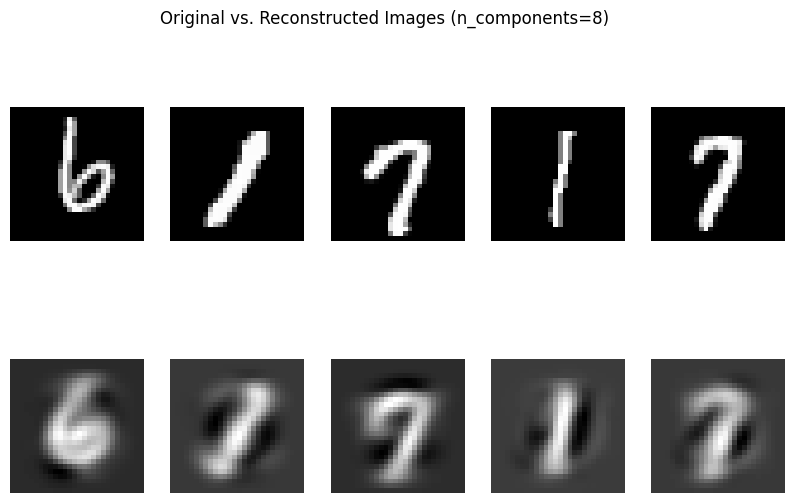

In [10]:
# Calculate the mean vector using the training data
mean_vector_train = np.mean(X_train, axis=0)

# Randomly select 5 indices from X_test
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
selected_images = X_test[random_indices]

# Use the previously computed top_eigenvectors for n_components=2
n_components = 8
top_eigenvectors = top_eigenvectors_list[n_components_list.index(n_components)]

# Center the selected test images using the mean vector from the training data
centered_selected_images = selected_images - mean_vector_train

# Perform PCA transformation
X_test_pca = np.dot(centered_selected_images, top_eigenvectors)

# Reconstruct the images
X_test_reconstructed = np.dot(X_test_pca, top_eigenvectors.T) + mean_vector_train

# Plot original and reconstructed images
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_test_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle(f"Original vs. Reconstructed Images (n_components={n_components})")
plt.show()

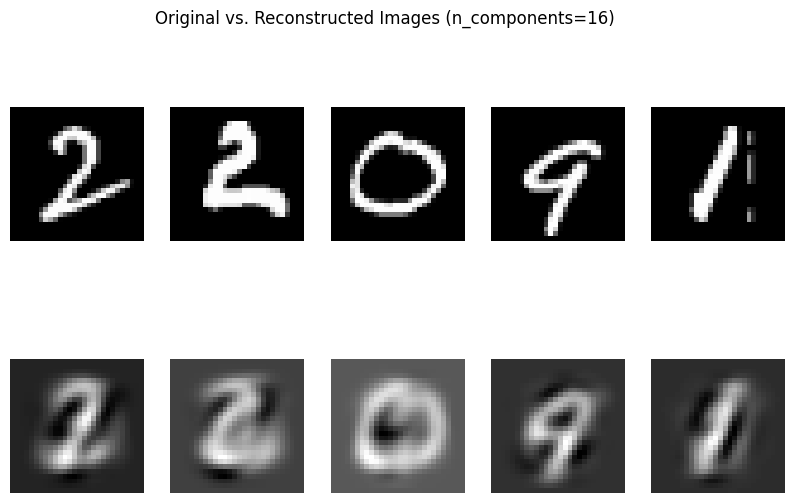

In [11]:
# Calculate the mean vector using the training data
mean_vector_train = np.mean(X_train, axis=0)

# Randomly select 5 indices from X_test
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
selected_images = X_test[random_indices]

# Use the previously computed top_eigenvectors for n_components=2
n_components = 16
top_eigenvectors = top_eigenvectors_list[n_components_list.index(n_components)]

# Center the selected test images using the mean vector from the training data
centered_selected_images = selected_images - mean_vector_train

# Perform PCA transformation
X_test_pca = np.dot(centered_selected_images, top_eigenvectors)

# Reconstruct the images
X_test_reconstructed = np.dot(X_test_pca, top_eigenvectors.T) + mean_vector_train

# Plot original and reconstructed images
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_test_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle(f"Original vs. Reconstructed Images (n_components={n_components})")
plt.show()

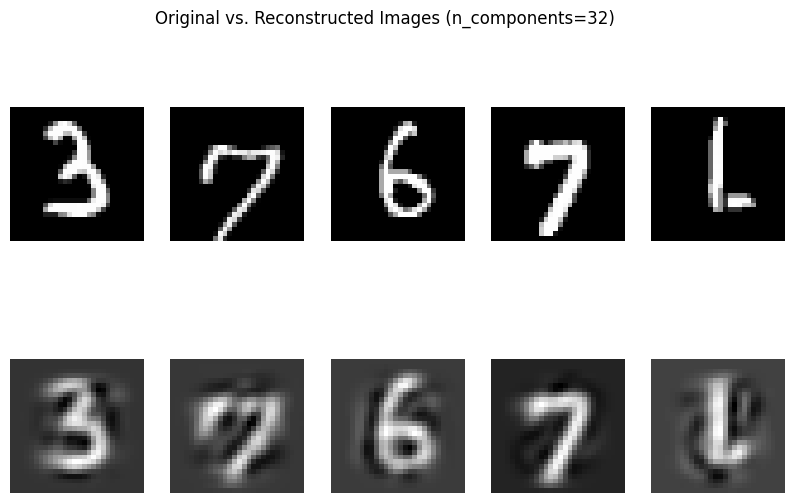

In [12]:
# Calculate the mean vector using the training data
mean_vector_train = np.mean(X_train, axis=0)

# Randomly select 5 indices from X_test
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
selected_images = X_test[random_indices]

# Use the previously computed top_eigenvectors for n_components=2
n_components = 32
top_eigenvectors = top_eigenvectors_list[n_components_list.index(n_components)]

# Center the selected test images using the mean vector from the training data
centered_selected_images = selected_images - mean_vector_train

# Perform PCA transformation
X_test_pca = np.dot(centered_selected_images, top_eigenvectors)

# Reconstruct the images
X_test_reconstructed = np.dot(X_test_pca, top_eigenvectors.T) + mean_vector_train

# Plot original and reconstructed images
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_test_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle(f"Original vs. Reconstructed Images (n_components={n_components})")
plt.show()

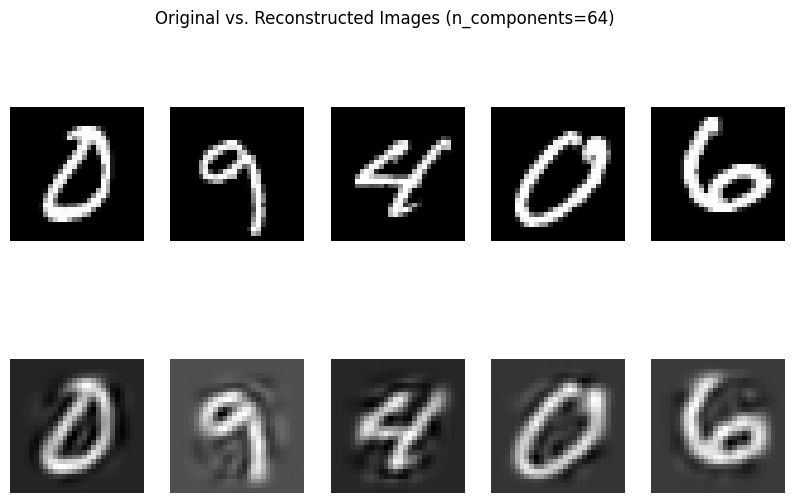

In [14]:
# Calculate the mean vector using the training data
mean_vector_train = np.mean(X_train, axis=0)

# Randomly select 5 indices from X_test
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
selected_images = X_test[random_indices]

# Use the previously computed top_eigenvectors for n_components=2
n_components = 64
top_eigenvectors = top_eigenvectors_list[n_components_list.index(n_components)]

# Center the selected test images using the mean vector from the training data
centered_selected_images = selected_images - mean_vector_train

# Perform PCA transformation
X_test_pca = np.dot(centered_selected_images, top_eigenvectors)

# Reconstruct the images
X_test_reconstructed = np.dot(X_test_pca, top_eigenvectors.T) + mean_vector_train

# Plot original and reconstructed images
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_test_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle(f"Original vs. Reconstructed Images (n_components={n_components})")
plt.show()